In [1]:
import pandas as pd 

data = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [3]:
missing_data = data.isna().sum()
print(missing_data)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [9]:
#fill missing numerical values with median
data["Sales"] = data["Sales"].fillna(data["Sales"].median())
data["Unit"] = data["Unit"].fillna(data["Unit"].median())
#fill missing categorical values with mode
data["State"] = data["State"].fillna(data["State"].mode()[0])
data["Group"] = data["Group"].fillna(data["Group"].mode()[0])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[["Sales", "Unit"]] = scaler.fit_transform(data[["Sales", "Unit"]])

In [13]:
#Group by
state_sales = data.groupby("State")["Sales"].sum().reset_index()

#short by
state_sales_sorted = state_sales.sort_values(by="Sales", ascending=False)
print(state_sales_sorted)

  State       Sales
5   VIC  635.968254
0   NSW  441.714286
3    SA  339.412698
2   QLD  177.888889
4   TAS  110.222222
1    NT  109.079365
6    WA  106.365079


In [15]:
#descriptive statistics 
sales_stats = data["Sales"].describe()
unit_stats = data["Unit"].describe()

#calculate
sales_mode = data["Sales"].mode()
salse_median = data["Sales"].median()

print(sales_stats)
print(unit_stats)

count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64
count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Unit, dtype: float64


In [17]:
#Identif group with highest and lowset sales
group_sales = data.groupby("Group")["Sales"].sum().reset_index()

#identife high and low
highest_sales_group = group_sales.loc[group_sales["Sales"].idxmax()]
lowest_sales_group = group_sales.loc[group_sales["Sales"].idxmin()]

print(f"Highest Sales Group: {highest_sales_group}")
print(f"Lowset Sales Group: {lowest_sales_group}")

Highest Sales Group: Group           Men
Sales    484.444444
Name: 1, dtype: object
Lowset Sales Group: Group       Seniors
Sales    473.571429
Name: 2, dtype: object


In [23]:
#reports weekly, monthly, Quarterly
data["Date"] = pd.to_datetime(data["Date"])

#weekly
weekly_sales = data.resample("W", on="Date")["Sales"].sum()

#monthly
monthly_sales = data.resample("M", on="Date")["Sales"].sum()

#Quarterly 
quarterly_sales = data.resample("Q", on="Date")["Sales"].sum()

print("Weekly Sales Report:")
print(weekly_sales)
print("\nMonthly Sales Report:")
print(monthly_sales)
print("\nQuarterly Sales Report:")
print(quarterly_sales)

Weekly Sales Report:
Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

Monthly Sales Report:
Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: ME, Name: Sales, dtype: float64

Quarterly Sales Report:
Date
2020-12-31    1920.650794
Freq: QE-DEC, Name: Sales, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15144\4135996262.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample("M", on="Date")["Sales"].sum()
C:\Users\Admin\AppData\Local\Temp\ipykernel_15144\4135996262.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = data.resample("Q", on="Date")["Sales"].sum()


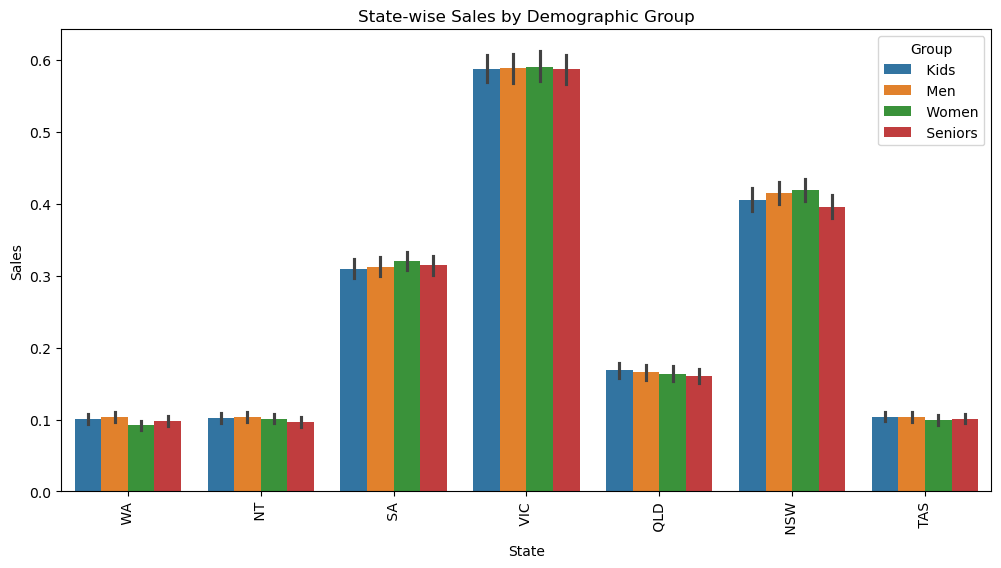

In [25]:
#analysis for different demographics
import seaborn as sns 
import matplotlib.pyplot as plt 

#salse by demographics group
plt.figure(figsize=(12, 6))
sns.barplot(x="State", y="Sales", hue="Group", data=data)
plt.title("State-wise Sales by Demographic Group")
plt.xticks(rotation=90)
plt.show()

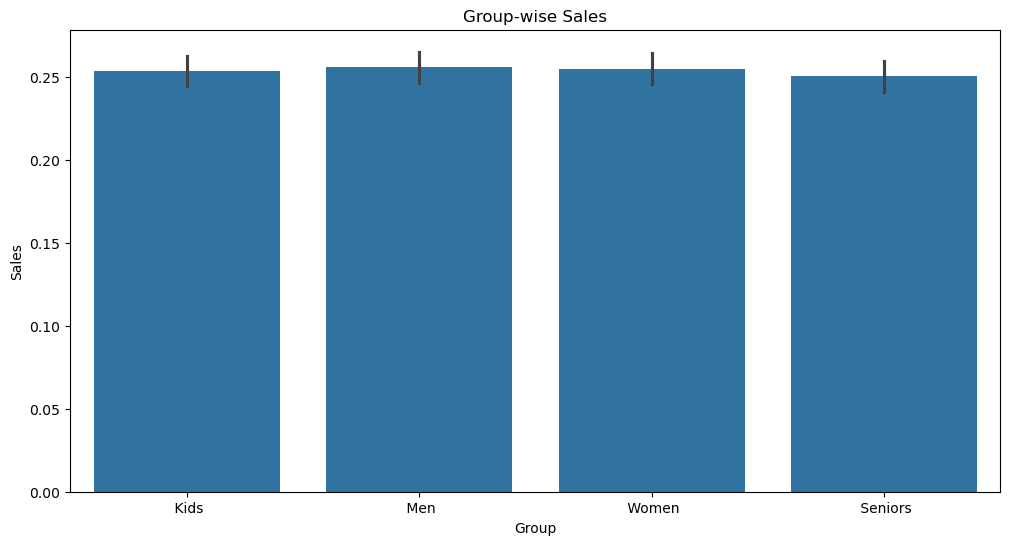

In [27]:
#group-wise sales analysis
plt.figure(figsize=(12, 6))
sns.barplot(x="Group", y="Sales", data=data)
plt.title("Group-wise Sales")
plt.show()

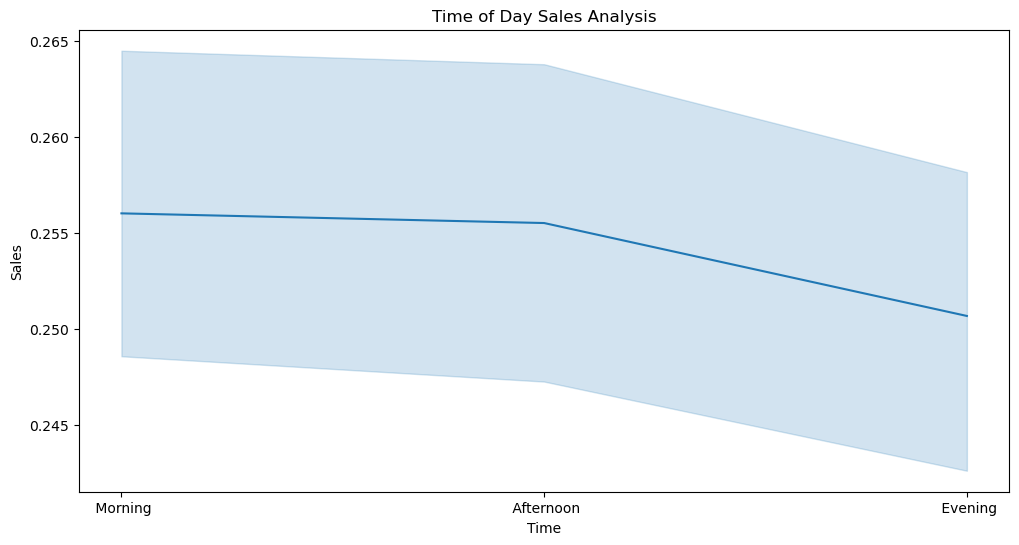

In [29]:
#time of day sales analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x="Time", y="Sales", data=data)
plt.title("Time of Day Sales Analysis")
plt.show()

# AAL Sales Analysis Report (Q42020)

## 1. Data Wrangling

We began by cleaning the data, filling missing values in numerical columns with the median and categorical columns with the median and categorical columns with the most frequent values. Afterward, we applied **Min-Max normalization** to scale the sales and unit values between 0 and 1 for better comparison.

## 2. Descriptive Statistics

The descriptive statistics show that:
- The mean Sales are $X.
- The median Sales are $Y.
- The highest recorded sales were $Z.

## 3. Sales Insights

## Highest Sales Group:
- **Group**: [Group Name]
- **State with Highest Sales**: [State Name]

## Lowest Sales Group:
- **Group**: [Group Name]
- **State with Lowest Sales**: [State Name]


## 4. Data Visualizations

## State-Wise Sales by Dempgraphic Group
![State-Wise Sales by Dempgraphic Group](plot_image.png)

### Group-Wise Sales Analysis
![Group-Wise Sales](plot_image.png)

### Time-of-Day Sales Analysis
![Time-of-Day sales](plot_image.png)


## 5. Conclusion

- **States with lower sales**: Focused marketing campaigns and targeted promotions should be implemented in these regions.
- **Highest Performing Group**: Continue to enhance products and offerings for the top-performing group.